### Import all relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from astropy.io import fits
from sklearn.mixture import GaussianMixture
import seaborn as sns

sns.set(style="darkgrid")

###  Load the data

In [4]:
df = fits.open('../Datafiles/mysterious-peaks.fits')

df.info()

points = df[0].data
points = points.reshape(-1, 1)

Filename: ../Datafiles/mysterious-peaks.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   (5268,)   float64   


### Visualize the histogram

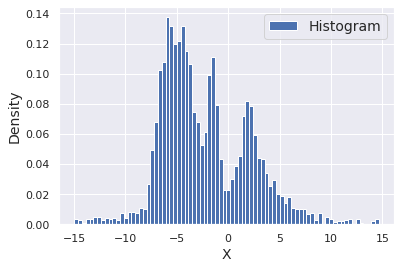

In [82]:
plt.hist(X, bins=80, density=True, label='Histogram')
plt.legend(fontsize=14)
plt.xlabel('X', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

### Gaussian Mixture Model (GMM)

With AIC and BIC scores.

In [70]:
X = points

# Set up a range of n_components to test
n_components_range = range(2, 15)

# Initialize a list to store the AIC and BIC scores for each model
aic_scores = []
bic_scores = []

# Iterate over the range of n_components
for n_components in n_components_range:    
    # Fit the GMM with the current value of n_components
    gmm = GaussianMixture(n_components=n_components, 
                          random_state=0, warm_start=True)
    gmm.fit(X)
    
    # Calculate the AIC score for the current model
    aic_scores.append(gmm.aic(X))
    
    # Calculate the AIC score for the current model
    bic_scores.append(gmm.bic(X))

# Find the index of the minimum AIC score
optimal_n_components_idx_AIC = np.argmin(aic_scores)
optimal_n_components_idx_BIC = np.argmin(bic_scores)

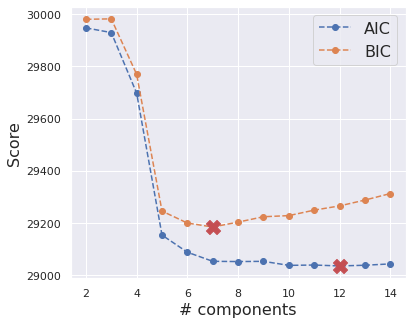

In [72]:
plt.figure(figsize=(5*1.2, 5))
plt.plot(n_components_range, aic_scores, '--o', label='AIC')
plt.plot(n_components_range, bic_scores, '--o', label='BIC')
plt.scatter(n_components_range[optimal_n_components_idx_AIC], min(aic_scores), marker='X', c='r', s=200, zorder=99)
plt.scatter(n_components_range[optimal_n_components_idx_BIC], min(bic_scores), marker='X', c='r', s=200, zorder=99)
plt.xlabel('# components', fontsize=16)
plt.ylabel('Score', fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.grid(True)
plt.show()

### Numeric scores versus human interpretation

AIC accuses 12 Gaussians, whereas BIC accuses 7 Gaussians. An analysis of the curves show that they plummet at n = 5 Gaussians and vary little afterward. Therefore, the more conservative human is to assume 5 Gaussians.

### Let's plot!

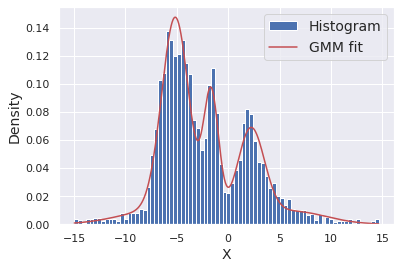

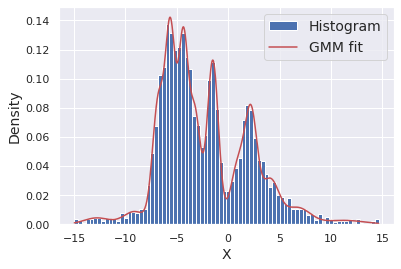

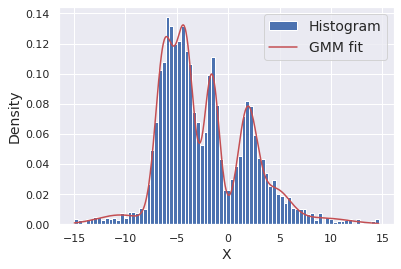

In [81]:
# Retrieve the optimal number of components
for optimal_n_components in [5, 
                             n_components_range[optimal_n_components_idx_AIC], 
                             n_components_range[optimal_n_components_idx_BIC]]:

    gmm = GaussianMixture(n_components=optimal_n_components, 
                        random_state=0, warm_start=True)
    gmm.fit(X)

    # Generate samples from GMM
    samples = gmm.sample(len(X)*2)[0]

    # Plot results
    plt.hist(X, bins=80, density=True, label='Histogram')
    x_plot = np.linspace(min(X), max(X), 1000)
    y_plot = np.exp(gmm.score_samples(x_plot.reshape(-1, 1)))
    plt.plot(x_plot, y_plot, '-r', label='GMM fit')
    plt.legend(fontsize=14)
    plt.xlabel('X', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.show()